---

<img src="../images/anchormen-logo.png" width="500">

---

# Basics Lab 3a: Data Preprocessing with Pandas 

## Goals

After this lab, you will:

- Know more about the `pandas` library in Python
- Know which data structures are introduced by `pandas`
- Be able to work with pandas `DataFrames`
- Be able to read/write data from/to different file types
- Know how to explore your data set
- Know about indexing and slicing
- Be able to use grouping
- Know how to use windowing
- Know where to find more information

## Tips

- Press 'h' to show **keyboard shortcuts** in Jupyter Notebooks
- Use **tab completion**: when typing a command, press 'tab' to get a dropdown list of options
- Use the **help( )** function to get help on a Python object
- You are encouraged to make use of the info sources below for this lab:
    - **Pandas documentation**: http://pandas.pydata.org/pandas-docs/stable/
    - Pandas in 10 minutes: http://pandas.pydata.org/pandas-docs/stable/10min.html
    - Things in Pandas I wish I'd known earlier: http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb

## A: Working with `pandas`

### Import pandas

We start off by loading the `pandas` and `matplotlib` libraries:

In [1]:
import pandas as pd
import matplotlib

# Inline plotting in notebook
%matplotlib inline
# Set image size for plotting
matplotlib.rcParams['figure.figsize'] = 12, 8

# Settings to display max number of columns/rows of pandas DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
# Disables `SettingWithCopyWarning` messages
pd.options.mode.chained_assignment = None

## B: Loading Data

Next, we need some data to work with.

**Exercise**: Let's load the `weather` dataset using `read_csv()` in `pandas`. Note that the dataset has been stored as `weather.csv` in the `data` directory of this repository. Verify that the data has been loaded correctly. Can you figure out how to prevent getting a column called 'Unnamed: 0'?

In [2]:
# If pd.read_csv fails, this is probably because the
# current working directory is not the one that
# contains this notebook and `weather.csv`.

df = pd.read_csv('../data/weather.csv', index_col=0)

df.head()

,date,location,maxtemp,sunshine,precipitation,cloudcover
28855,1980-01-01,De Bilt,2.3,2.3,58,5.0
28856,1980-01-02,De Bilt,2.9,2.7,6,4.0
28857,1980-01-03,De Bilt,0.5,0.0,13,6.0
28858,1980-01-04,De Bilt,3.8,0.0,91,8.0
28859,1980-01-05,De Bilt,4.9,0.0,42,8.0


**Exercise**: Check how to load other kinds of data in the pandas documentation. Can you find info on how to read json, Excel or Parquet files?

In [3]:
# Json files can be read using pd.read_json().
# More info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html

# Excel files can be read using pd.read_excel().
# More info: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html

# Parquet files can be read using pd.read_parquet().
# More info: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_parquet.html

**Note**: A few comments on common data storage formats:

- **csv**: For tabular data, often used for data sharing, not very efficient in terms of storage or querying, fairly vulnerable to corruption, sometimes unclear encoding scheme.
- **xlsx**: Often used for (tabular) data sharing with broad group of users, and reporting to business.
- **json**: Generic data format, for nested data.
- **parquet**: Columnar storage format, designed for efficient columnar storage, built from the ground up with complex nested data structures in mind, supports efficient compression and encoding schemes and allows for lower data storage costs and efficient querying.

## C: Exploring the DataFrame

In [4]:
df.head()

,date,location,maxtemp,sunshine,precipitation,cloudcover
28855,1980-01-01,De Bilt,2.3,2.3,58,5.0
28856,1980-01-02,De Bilt,2.9,2.7,6,4.0
28857,1980-01-03,De Bilt,0.5,0.0,13,6.0
28858,1980-01-04,De Bilt,3.8,0.0,91,8.0
28859,1980-01-05,De Bilt,4.9,0.0,42,8.0


**Exercise**: Use the info( ) and describe( ) methods to find out more about the data set. What does this tell you? Why doesn't describe( ) show info on all variables? Which method can always be used to extract the complete list of column names?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40245 entries, 28855 to 404432
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           40245 non-null  object 
 1   location       40245 non-null  object 
 2   maxtemp        40245 non-null  float64
 3   sunshine       40245 non-null  float64
 4   precipitation  40245 non-null  int64  
 5   cloudcover     40214 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.1+ MB


In [6]:
df.describe()

,maxtemp,sunshine,precipitation,cloudcover
count,40245.000000,40245.000000,40245.000000,40214.000000
mean,13.816740,4.553972,21.584122,5.362187
std,7.183625,4.126822,45.030580,2.189342
min,-12.300000,-0.100000,-1.000000,0.000000
25%,8.500000,0.700000,0.000000,4.000000
50%,13.800000,3.700000,1.000000,6.000000
75%,19.100000,7.500000,24.000000,7.000000
max,38.200000,15.700000,902.000000,8.000000


In [7]:
# Note that describe() only shows info on the numeric variables of the dataframe.

In [8]:
# Use df.columns to always see complete list of column names
df.columns

Index(['date', 'location', 'maxtemp', 'sunshine', 'precipitation',
       'cloudcover'],
      dtype='object')

Let's visualize part of the data using the plot( ) method:

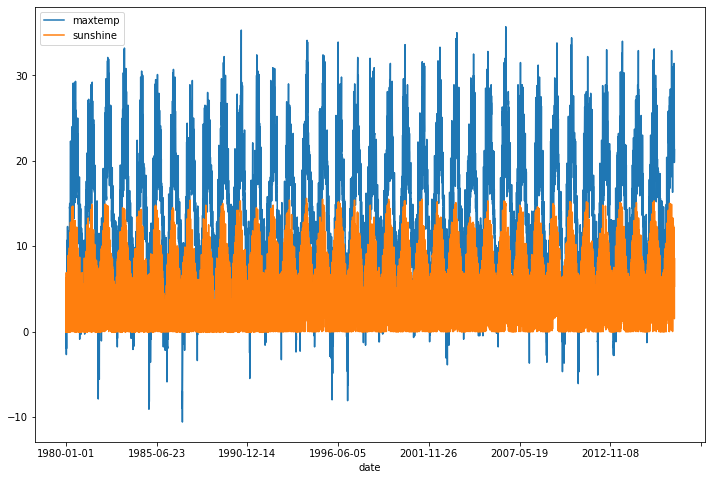

In [9]:
df[df.location == 'De Bilt'].plot(x = 'date', y = ['maxtemp', 'sunshine']);

**Optional**: Feel free to create some more plots. Say, for a location other than 'De Bilt'.

In [10]:
# Check which locations are present in the data set
df.location.unique()

array(['De Bilt', 'Maastricht', 'De Kooy'], dtype=object)

<AxesSubplot:xlabel='date'>

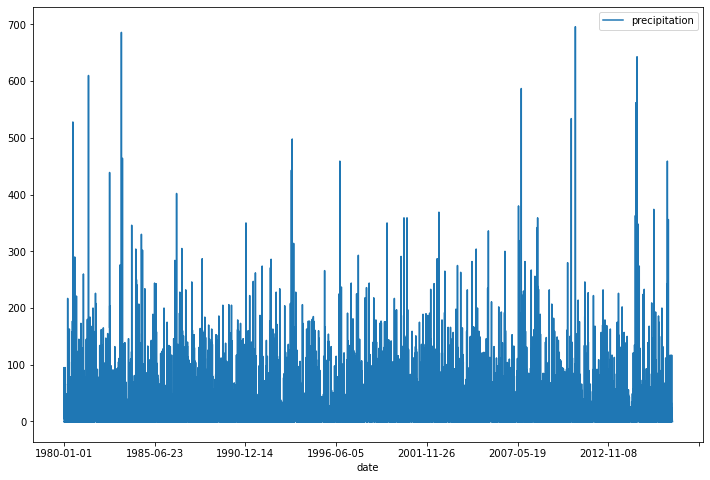

In [11]:
# Plot precipitation in Maastricht
df[df.location == 'Maastricht'].plot(x = 'date', y = 'precipitation')

**Exercise**: Explore the data a bit more by applying the `hist()` method

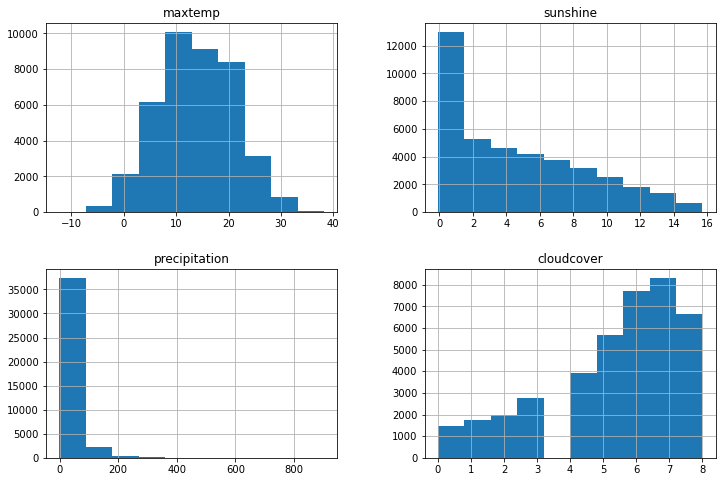

In [12]:
df.hist();

## D: Data cleaning

**Exercise**: Convert the precipitation column to float64 format using the `astype` method:

In [13]:
df['precipitation'] = df['precipitation'].astype('float64')

**Exercise**: Use the `to_datetime()` function in `pandas` to convert the `date` column of `df` to type datetime64

In [14]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

And do a quick verification of this change:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40245 entries, 28855 to 404432
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           40245 non-null  datetime64[ns]
 1   location       40245 non-null  object        
 2   maxtemp        40245 non-null  float64       
 3   sunshine       40245 non-null  float64       
 4   precipitation  40245 non-null  float64       
 5   cloudcover     40214 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.1+ MB


**Exercise**: Set the index of `df` to the `date` column. This will help us doing easier selections by date or date range, as we will see later. You can find out how to set the index in the `pandas` documentation or by checking tab completion. Verify that your changes are done correctly.

In [16]:
df.set_index('date', inplace=True)
# For index slicing using dates(see below), index must be ordered
df = df.sort_index()
df.head()

,location,maxtemp,sunshine,precipitation,cloudcover
date,,,,,
1980-01-01,De Bilt,2.3,2.3,58.0,5.0
1980-01-01,Maastricht,1.4,0.7,11.0,6.0
1980-01-01,De Kooy,4.1,4.1,31.0,5.0
1980-01-02,De Bilt,2.9,2.7,6.0,4.0
1980-01-02,Maastricht,1.2,2.2,5.0,6.0


**Exercise**: When making changes to dataframes, note that many of the dataframe methods accept an argument 'inplace=True'. Do you understand what this argument does?

In [17]:
# Without the inplace=True argument, the command df.set_index('date') is not stored to the df dataframe.

# df.set_index('date', inplace=True) is equavalent to: df = df.set_index('date')

## E: Slicing and Resampling
There are a few different ways to select subsets of the data:

- Selection by row numbers
- Selection by index
- Selection by label using `.loc`
- Selection by position using `.iloc`

We will show these different methods below.

#### Selection by row numbers

In [18]:
df[5:7]

,location,maxtemp,sunshine,precipitation,cloudcover
date,,,,,
1980-01-02,De Kooy,3.8,1.8,11.0,4.0
1980-01-03,De Bilt,0.5,0.0,13.0,6.0


#### Selection by index

**Exercise**: Now find out how to take a slice of the DataFrame by selecting on its index. (Note that we created this index in the part above.) Display all data points in the date range from, say, 1989-11-09 to 1989-11-12.

In [19]:
df['1989-11-09':'1989-11-12']

,location,maxtemp,sunshine,precipitation,cloudcover
date,,,,,
1989-11-09,De Bilt,11.3,3.9,25.0,6.0
1989-11-09,Maastricht,9.8,7.4,0.0,2.0
1989-11-09,De Kooy,10.9,4.7,30.0,6.0
1989-11-10,Maastricht,10.0,0.0,18.0,7.0
1989-11-10,De Kooy,12.0,0.0,21.0,8.0
1989-11-10,De Bilt,10.7,0.0,20.0,7.0
1989-11-11,De Kooy,10.9,5.4,0.0,5.0
1989-11-11,De Bilt,12.0,6.1,0.0,6.0
1989-11-11,Maastricht,14.0,6.6,0.0,3.0


#### Selection by label using `.loc`

We can take more complex slices such as:

In [20]:
df.loc['1989-11-09':'1989-11-11', ['location', 'maxtemp', 'precipitation']]

,location,maxtemp,precipitation
date,,,
1989-11-09,De Bilt,11.3,25.0
1989-11-09,Maastricht,9.8,0.0
1989-11-09,De Kooy,10.9,30.0
1989-11-10,Maastricht,10.0,18.0
1989-11-10,De Kooy,12.0,21.0
1989-11-10,De Bilt,10.7,20.0
1989-11-11,De Kooy,10.9,0.0
1989-11-11,De Bilt,12.0,0.0
1989-11-11,Maastricht,14.0,0.0


In [21]:
df.loc[df.location == 'De Bilt'].loc['1989-11-09':'1989-11-13', ['maxtemp', 'precipitation']]

,maxtemp,precipitation
date,,
1989-11-09,11.3,25.0
1989-11-10,10.7,20.0
1989-11-11,12.0,0.0
1989-11-12,14.0,0.0
1989-11-13,13.8,0.0


#### Selection by position using `.iloc`

**Exercise**: Find out in the `pandas` documenation how to use `.iloc` and select rows 4 to 6 and columns 2 and 3, regardless of their name or index

In [22]:
df.iloc[3:5, 1:3]

,maxtemp,sunshine
date,,
1980-01-02,2.9,2.7
1980-01-02,1.2,2.2


## F: Resampling

`pandas` allows easy resampling of data by time period. The following example shows how to aggregate/resample daily data to monthly data by taking the mean:

In [23]:
df_montly_means = df.resample('m').mean()
df_montly_means.head(4)

,maxtemp,sunshine,precipitation,cloudcover
date,,,,
1980-01-31,2.581720,1.636559,16.451613,5.645161
1980-02-29,7.805747,2.171264,16.425287,5.919540
1980-03-31,7.832258,2.108602,21.688172,6.268817
1980-04-30,11.712222,5.312222,12.555556,4.800000


**Exercise**: Can you find out how to find yearly maximums?

In [24]:
df_yearly_max = df.resample('a').max()
df_yearly_max.head(4)

,location,maxtemp,sunshine,precipitation,cloudcover
date,,,,,
1980-12-31,Maastricht,29.6,14.8,663.0,8.0
1981-12-31,Maastricht,29.9,14.9,610.0,8.0
1982-12-31,Maastricht,32.8,15.1,526.0,8.0
1983-12-31,Maastricht,33.2,15.2,686.0,8.0


<AxesSubplot:xlabel='date'>

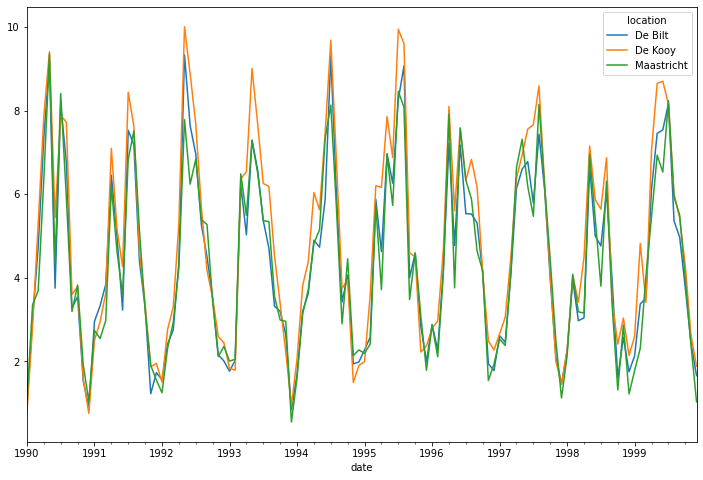

In [25]:
# Extra: plot mean monthly hours of sunshine per day for each location
df.pivot(columns = "location", values = "sunshine") \
    ['1990-01-01': '1999-12-31'] \
    .resample('M').mean() \
    .plot()

<AxesSubplot:title={'center':'Mean Sunshine Hours '}, xlabel='date'>

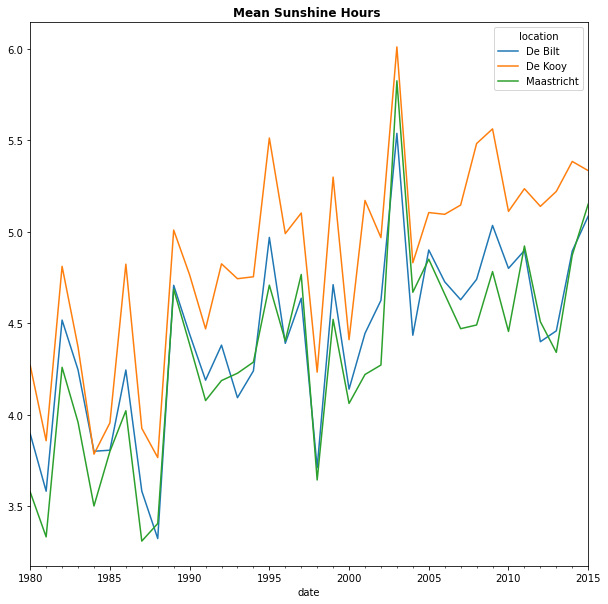

In [26]:
# Extra: plot mean yearly hours of sunshine per day for each location
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Mean Sunshine Hours ', fontweight="bold")

# Plot mean monthly hours of sunshine per day for each location
df.pivot(columns = "location", values = "sunshine") \
    ['1980-01-01': '2015-12-31'] \
    .resample('Y').mean() \
    .plot(ax=ax)

<AxesSubplot:xlabel='date'>

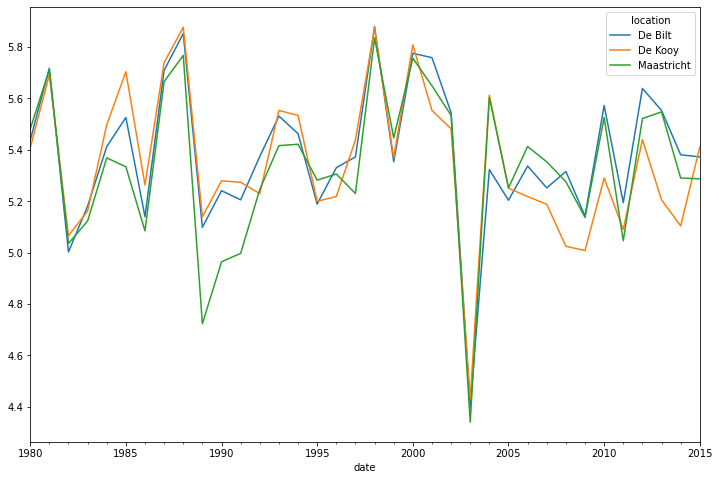

In [27]:
# Plot mean yearly cloudcover for each location
df.pivot(columns = "location", values = "cloudcover") \
    ['1960-01-01': '2015-12-31'] \
    .resample('Y').mean() \
    .plot()

## G: Adding variables

**Exercise**: Find out how to add a column called `month` to the dataframe, which contains the name of the month ('January', 'February', ..). Hint: use a method starting with `df.index.<method>` to retrieve information from the dataframe's index.

In [28]:
df['month'] = df.index.month
df.head()

,location,maxtemp,sunshine,precipitation,cloudcover,month
date,,,,,,
1980-01-01,De Bilt,2.3,2.3,58.0,5.0,1
1980-01-01,Maastricht,1.4,0.7,11.0,6.0,1
1980-01-01,De Kooy,4.1,4.1,31.0,5.0,1
1980-01-02,De Bilt,2.9,2.7,6.0,4.0,1
1980-01-02,Maastricht,1.2,2.2,5.0,6.0,1


## H: Grouping

Use the groupby( ) method to apply functions to grouped subsets:

In [29]:
df_grouped = df.groupby('location')
df_grouped.max()

,maxtemp,sunshine,precipitation,cloudcover,month
location,,,,,
De Bilt,35.7,15.6,639.0,8.0,12
De Kooy,34.6,15.7,902.0,8.0,12
Maastricht,38.2,15.2,696.0,8.0,12


**Exercise**: Find the average amount of sunshine per `month` of the year for each `location`.

In [30]:
df.groupby(['location', 'month']).sunshine.mean()

location    month
De Bilt     1        2.004098
            2        3.063289
            3        4.084830
            4        5.883784
            5        6.757803
                       ...   
Maastricht  8        6.102703
            9        4.823321
            10       3.690323
            11       2.252500
            12       1.494355
Name: sunshine, Length: 36, dtype: float64

**Exercise**: Find the maximum temperature per `month` of the year for each `location`

In [31]:
df.groupby(['location', 'month']).maxtemp.max()

location    month
De Bilt     1        15.1
            2        16.9
            3        21.8
            4        28.9
            5        32.0
                     ... 
Maastricht  8        36.2
            9        32.7
            10       26.6
            11       21.4
            12       16.4
Name: maxtemp, Length: 36, dtype: float64

## I: Optional: Windowing and Lagging

We will create a separate dataframe for all data points measured at location 'De Bilt':

In [32]:
df_debilt = df[df.location == 'De Bilt']

#### Windowing

Adding a column that represents the moving average of the last 90 days can be done in the following way:

In [33]:
df_debilt['sunshine_moving_average'] = df_debilt['sunshine'].rolling(window = 90).mean()

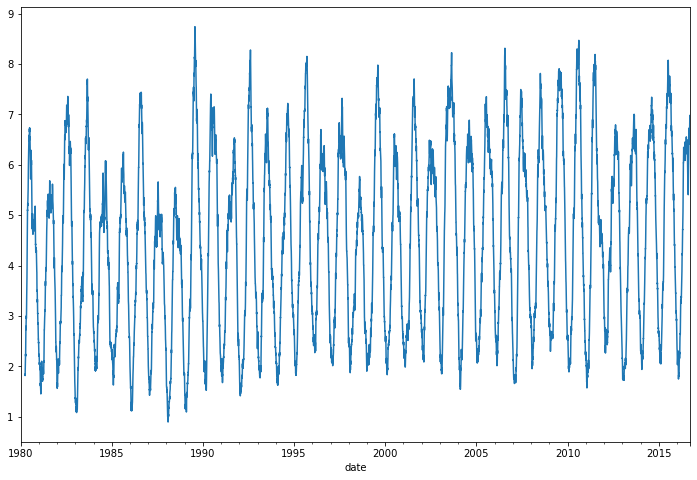

In [34]:
df_debilt.sunshine_moving_average.plot();

#### Lagging (shifting)

**Exercise**: Add two columns to `df_debilt` called `precipitation_yesterday` and `precipitation_lastweek` which contain the `precipitation` values from the previous day and from last week. Hint: use the `.shift()` method

In [35]:
df_debilt['precipitation_yesterday'] = df_debilt.precipitation.shift(1)
df_debilt['precipitation_lastweek'] = df_debilt.precipitation.shift(7)

**Exercise**: By plotting `precipitation_yesterday` and/or `precipitation_lastweek` vs `sunshine`, have a quick look at the question whether there will be sunshine after rain. ;)

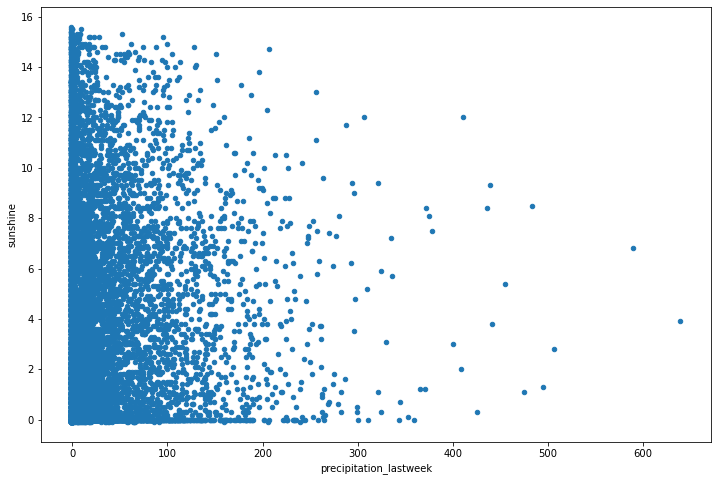

In [36]:
df_debilt.plot(x = 'precipitation_lastweek', y = 'sunshine', kind = 'scatter');

## J: Writing output

**Exercise**: Select all datapoints for location 'Maastricht' from the 90's and see how you can save them to an output file called `weatherdata_maastricht_1990_to_1999.xlsx` (and/or csv, json, parquet). Verify the output file(s) manually.

In [38]:
df_maastricht_90s = df[df['location'] == 'Maastricht']['1990-01-01':'1999-12-31']

df_maastricht_90s.to_excel('weatherdata_maastricht_1990_to_1999.xlsx')
df_maastricht_90s.to_csv('weatherdata_maastricht_1990_to_1999.csv')
df_maastricht_90s.to_json('weatherdata_maastricht_1990_to_1999.json')
# pyarrow package should be installed with the following command
# pip install pyarrow
df_maastricht_90s.to_parquet('weatherdata_maastricht_1990_to_1999.parquet')

## K. Converting long to wide

**Exercise**: Now export your data to a file called `daily_maxtemp_per_location.xlsx` by first selecting only the date, location and maxtemp values, then converting your data to wide format and finally writing them to disk. Your data should have column names "date", "De Bilt", "De Kooy" and "Maastricht".

In [39]:
df[['location', 'maxtemp']] \
    .pivot(columns = 'location', values = 'maxtemp') \
    .to_excel('daily_maxtemp_per_location.xlsx')

In [40]:
# Alternatively, if dates should be in 'date' format instead of 'datetime' format
df_maxtemp = df.reset_index()[['date', 'location', 'maxtemp']]
df_maxtemp['date'] = df_maxtemp['date'].dt.date
df_maxtemp.pivot(index='date', columns = 'location', values = 'maxtemp') \
    .to_excel('daily_maxtemp_per_location.xlsx', index=True)

Note that `df.pivot()` is used for conversion to wide format and `df.melt()` to long format.

# Conclusion

You have reached the end of this lab. Take a moment to:

- Review the lab goals at the top of this notebook. Did you learn what you set out to learn?
- Review the commands used in this notebook, as listed in the Summary section below
- Feel free to share your solution code with other participants (for example by pushing it to https://gitlab.com/anchormen/hpp-playground)

You might also consider reading more of the resources mentioned in the first section.

# Summary

**Getting started**:
- import pandas
- help()

**Loading data**:
- pd.read_csv()
- pd.read_json()
- pd.read_excel()
- pd.read_parquet()

**Exploring**:
- df.head()
- df.info()
- df.describe()
- df.columns
- df.plot()
- df.hist()
  
** Data cleaning**:
- series.astype()
- pd.to_datetime()
- df.set_index()
- Special attention to the inplace argument

** Subsetting and slicing**:
- Subsetting: df[df.location == 'De Bilt']
- Selection by row numbers: df[5:7]
- Selection by index: df['1989-11-09':'1989-11-12']
- Selection by label using .loc: df.loc['1989-11-09':'1989-11-11', ['location', 'maxtemp', 'precipitation']]
- Selection by position using .iloc: `df.iloc[3:5, 1:3]`

** Resampling**:
- df.resample()
  
** Extending dataframe**:
- Adding variables: df['month'] = df.index.month

**Grouping**:
- df.groupby()
  
** Windowing and lagging**:
- df.rolling()
- df.shift()

**Saving data**:
- df.to_csv()
- df.to_json()
- df.to_excel()
- df.to_parquet()

**Long/wide conversion**:
- df.pivot()
- df.melt()